# Análise Exploratória $→$ *Recursos Humanos*

- **Projeto de Machine Learning**

Suponhamos hipoteticamente que o gerente do setor de RH (Recursos Humanos) queira que façamos uma análise descritiva e preditiva que ajude-o à prever quais são os fatores que influenciam na demissão ou na retenção de um funcionário na empresa, os objetivos do gerente ao obter tal análise são (1) implementar medidas no setor de RH que possam evitar a demissão futura dos funcionários e também (2) ter um modelo preditivo que o ajude a prever probabilisticamente a propensão de um funcionário demitir-se ou não da empresa, com base em outras variáveis influenciáveis.

Com base nos objetivos hipotéticos citados acima, realizei uma limpeza e uma análise exploratória no conjunto de dados de RH de uma empresa fictícia, e em subsequência treinei um algoritmo de regressão logística para obter um modelo preditivo que ajudasse a prever a propensão de um funcionário da empresa demitir-se ou não no futuro.

## **Bibliotecas**

In [ ]:
# Importação de bibliotecas que serão usadas no projeto:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## **Importação do dataset**

In [ ]:
# Importação do conjunto de dados que será usado:
df = pd.read_csv('HR_comma.csv')

# Leitura breve das cinco primeiras linhas do conjunto de dados:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## **Tratamento dos dados**

In [ ]:
# Linhas e colunas do dataset atribuídas separadamente à duas variáveis:

l, c = df.shape

In [ ]:
# Impressão da quantidade de linhas e de colunas contidas no dataframe:

print(f'Quantidade de Linhas: {l}')
print('\n')
print(f'Quantidade de Colunas: {c}')

Quantidade de Linhas: 14999


Quantidade de Colunas: 10


In [ ]:
# Informações generalizadas do dataset:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
# Conversão textual do nome das colunas, para que todas as colunas tenham uma formatação textual somente de letras minúsculas:

df.columns = df.columns.str.lower()

In [ ]:
# Nome das colunas incluídas no dataset:

df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [ ]:
# Quantidade de dados ausentes no dataset:

df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

## **Análise exploratória dos dados** $(EDA)$

#### $1.$ Qual é a quantidade de funcionários demitidos e retidos desta empresa?

In [ ]:
# Porcentagem da quantidade de funcionários retidos e demitidos da empresa:

(df.left.value_counts(normalize = True) * 100).round(2)

0    76.19
1    23.81
Name: left, dtype: float64

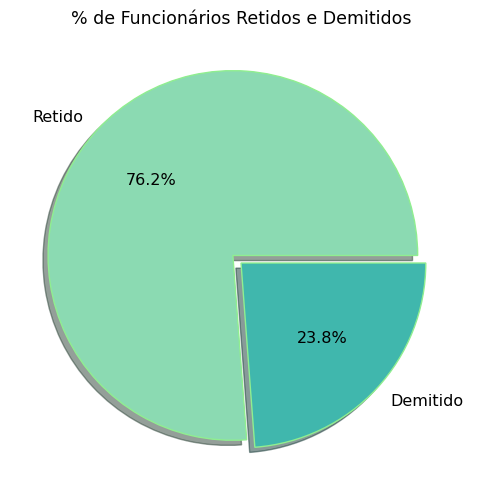

In [ ]:
# Gráfico de pizza para visualizarmos proporcionalmente a quantidade de funcionários retidos e demitidos:

plt.figure(figsize = (16, 6))
plt.pie(x = df.left.value_counts(),
        labels = ['Retido', 'Demitido'],
        autopct = '%1.1f%%', explode = [0.06, 0],
        textprops = {'fontsize': 11.5,
                                      'color': 'k'},
        shadow = True, colors = sns.color_palette('mako_r'),
        wedgeprops = {'edgecolor' : 'lightgreen'})
plt.title('% de Funcionários Retidos e Demitidos', fontsize = 12.5, color = 'k')
plt.show()

#### $2.$ Qual é a porcentagem de funcionários por classificação salarial?

In [ ]:
# % de funcionários por classificação salarial (baixo, médio ou alto salário):

(df.salary.value_counts(normalize = True) * 100).round(2)

low       48.78
medium    42.98
high       8.25
Name: salary, dtype: float64

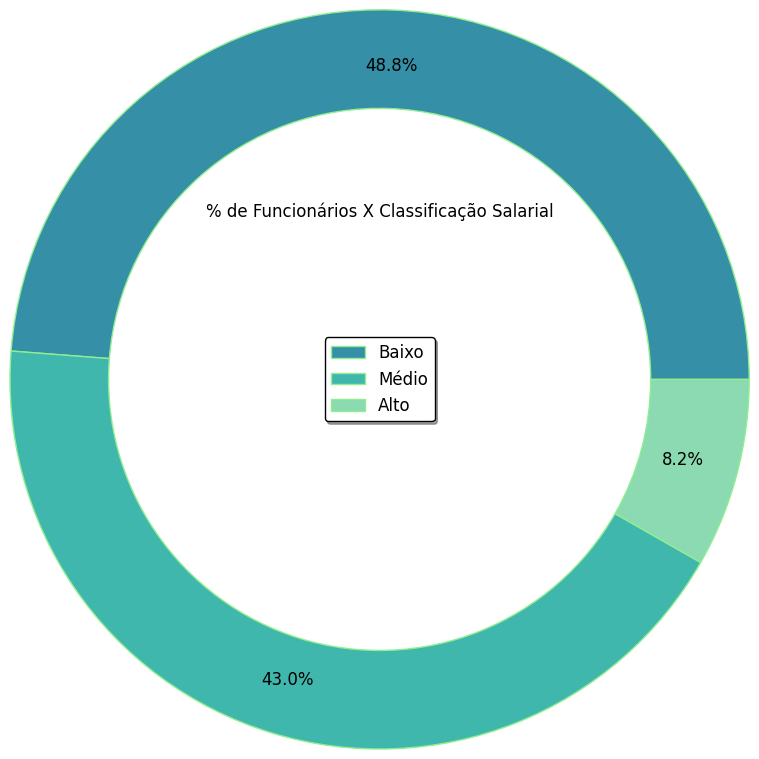

In [ ]:
# Gráfico de rosca para vermos a proporção de funcionários por classificação salarial que trabalham nesta empresa:

plt.figure(figsize = (4, 4))
plt.pie(df.salary.value_counts(),
        labeldistance = 1, radius = 3, colors = sns.color_palette('mako')[3:],
        wedgeprops = dict(width = 0.8, edgecolor = 'lightgreen'), autopct = '%1.1f%%', textprops = {'fontsize': 12, 'color' : 'k'},
        pctdistance = 0.85)
plt.legend(labels = ['Baixo', 'Médio', 'Alto'], loc = 'center', prop = {'size': 12}, edgecolor = 'k', shadow = True)
plt.title('% de Funcionários X Classificação Salarial', loc = 'Center',
          fontdict = {'fontsize': 12}, color = 'k')
plt.show()

#### $3.$ Qual é a taxa de retenção e demissão dos funcionários por classificação salarial?

In [ ]:
# Agrupamento da quantidade de funcionários demitidos e retidos por classificão salarial:

df_salary_retention = df.groupby(['salary', 'left']).agg({'left': 'size'})

In [ ]:
# Renomeação da coluna:

df_salary_retention.rename(columns = {'left': 'qtd_left'}, inplace = True)

In [ ]:
# Visualização da quantidade de demissões e retenções pela classificação salarial dos funcionários:

df_salary_retention

qtd_left
salary left          
high   0         1155
       1           82
low    0         5144
       1         2172
medium 0         5129
       1         1317

In [ ]:
# Criação de coluna para representar a porcentagem de retenção / demissão por classificação salarial dos funcionários:

df_salary_retention = df_salary_retention.assign(perc_left =
                           (df_salary_retention.qtd_left /
                            df_salary_retention.qtd_left.sum() * 100)).round(2)

In [ ]:
# Dataframe final com a quantidade e a porcentagem de retenção / demissão por classificação de salários dos funcionários da empresa:

df_salary_retention

qtd_left  perc_left
salary left                     
high   0         1155       7.70
       1           82       0.55
low    0         5144      34.30
       1         2172      14.48
medium 0         5129      34.20
       1         1317       8.78

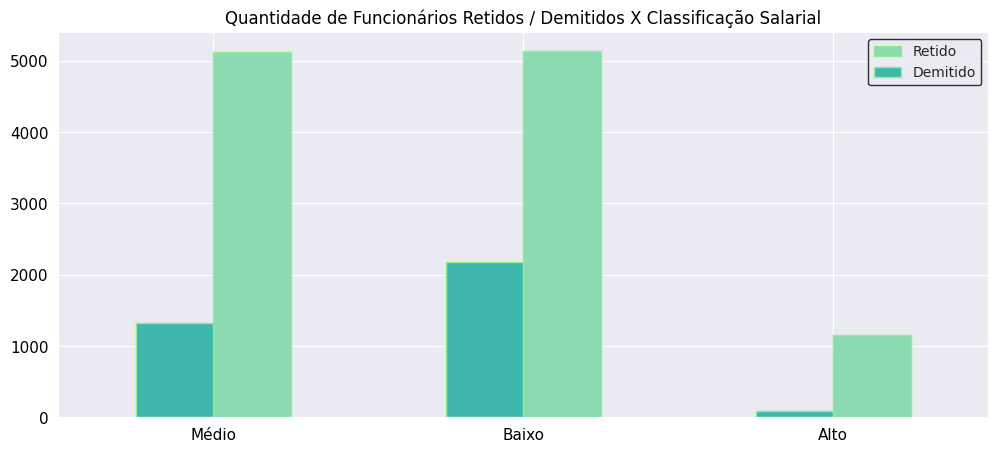

In [ ]:
# Gráfico de barras horizontais para visualizarmos a quantidade de retenções e demissões por classificação salarial:

sns.set_style('darkgrid')
ax = pd.crosstab(df['salary'], df.left).plot(kind = 'bar',
                                             color = sns.color_palette('mako_r'),
                                             edgecolor = 'lightgreen')
ax.figure.set_size_inches(12, 5)
ax.set_xlabel('')
ax.set_xticklabels(['Alto', 'Baixo', 'Médio'],
                   fontsize = 11, color = 'k',
                   rotation = 360)
ax.set_yticklabels(list(range(0, 5001, 1000)),
                   fontsize = 11, color = 'k')
ax.legend(['Retido', 'Demitido'], fontsize = 10, edgecolor = 'k')
ax.invert_xaxis()
ax.set_title('Quantidade de Funcionários Retidos / Demitidos X Classificação Salarial',
             fontsize = 12, color = 'k')
plt.show()

#### $4.$ Qual é a quantidade de retenções e demissões de funcionários por departamento?

In [ ]:
# Agrupamento da quantidade de demissões / retenções por departamento:

df.groupby(['sales', 'left']).agg({'left': 'count'}).rename(columns = {
    'left': 'qtd_left'
}).sort_values(['left', 'qtd_left'],
               ascending = False)

,,qtd_left
sales,left,
sales,1,1014
technical,1,697
support,1,555
IT,1,273
hr,1,215
accounting,1,204
marketing,1,203
product_mng,1,198
RandD,1,121


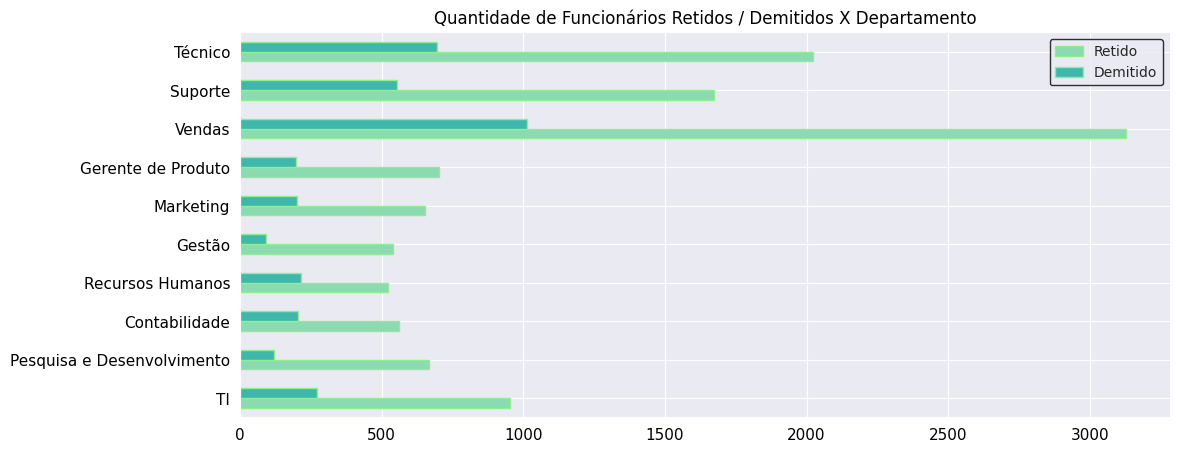

In [ ]:
# Gráfico de barras horizontais para representar a quantidade de retenções e demissões por departamento:

sns.set_style('darkgrid')
ax = pd.crosstab(df['sales'], df.left).plot(kind = 'barh',
                                             color = sns.color_palette('mako_r'),
                                             edgecolor = 'lightgreen')
ax.figure.set_size_inches(12, 5)
ax.set_xlabel('')
ax.set_yticklabels(reversed(['Técnico',                    'Suporte',
                    'Vendas',
                    'Gerente de Produto',
                    'Marketing',
                    'Gestão',
                    'Recursos Humanos',
                    'Contabilidade',
                   'Pesquisa e Desenvolvimento',
'TI']),
                   fontsize = 11, color = 'k'
                   )
ax.set_xticklabels(list(range(0, 3001, 500)),
                   fontsize = 11, color = 'k')
ax.legend(['Retido', 'Demitido'], fontsize = 10, edgecolor = 'k')
#ax.invert_yaxis()
ax.set_ylabel('')
ax.set_title('Quantidade de Funcionários Retidos / Demitidos X Departamento',
             fontsize = 12, color = 'k')
plt.show()

#### $5.$ Qual é a média e a mediana das demais variáveis por taxa de retenção dos funcionários?

In [ ]:
# Média das demais variáveis agrupada pela retenção (0) ou demissão dos funcionários:

df.groupby('left').mean().round(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years
left,,,,,,,
0,0.67,0.72,3.79,199.06,3.38,0.18,0.03
1,0.44,0.72,3.86,207.42,3.88,0.05,0.01


In [ ]:
# Mediana das demais variáveis agrupada pela retenção (0) ou demissão dos funcionários:

df.groupby('left').median()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years
left,,,,,,,
0,0.69,0.71,4.0,198.0,3.0,0.0,0.0
1,0.41,0.79,4.0,224.0,4.0,0.0,0.0


#### $6.$ Qual é a taxa de funcionários retidos e demitidos que receberam promoções na empresa nos últimos $5$ anos?

In [ ]:
# Agrupamento de funcionários retidos e demitidos da empresa que receberam promoções nos últimos 5 anos:

df_promotion_left = df.groupby(['left', 'promotion_last_5years']).agg({'promotion_last_5years': 'count'}
                                                  ).rename(columns = {'promotion_last_5years': 'qtd_promotion_last_5years'})

In [ ]:
# % de funcionários retidos e demitidos que receberam promoções nos últimos 5 anos:

df_promotion_left = df_promotion_left.assign(perc_promotion_last_5years =
                         df_promotion_left.qtd_promotion_last_5years / df_promotion_left.qtd_promotion_last_5years.sum() * 100).round(2)

In [ ]:
# Visualização do dataframe criado com a quantidade e o percentual de funcionários retidos e demitidos
# que receberam promoções nos últimos 5 anos na empresa:

df_promotion_left

qtd_promotion_last_5years  \
left promotion_last_5years                              
0    0                                          11128   
     1                                            300   
1    0                                           3552   
     1                                             19   

                            perc_promotion_last_5years  
left promotion_last_5years                              
0    0                                           74.19  
     1                                            2.00  
1    0                                           23.68  
     1                                            0.13

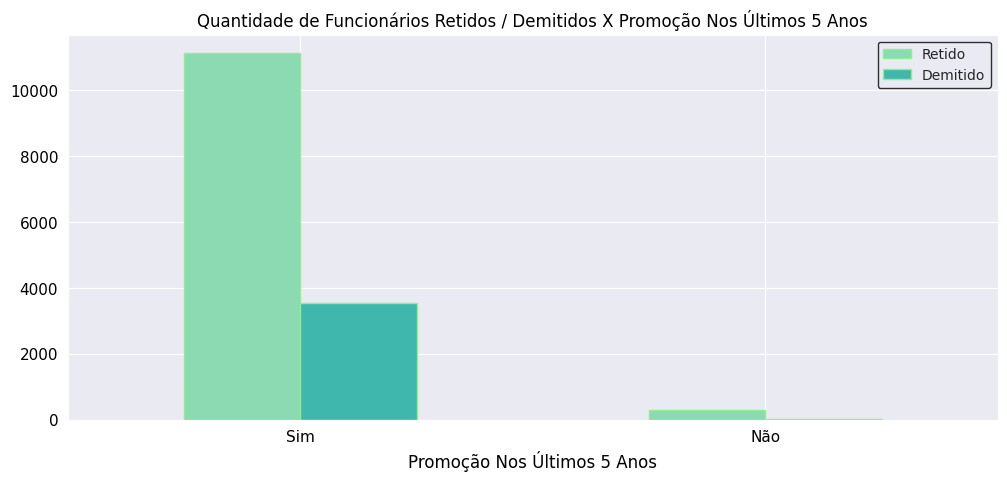

In [ ]:
# Gráfico de barras horizontais para visualizarmos a quantidade de retenções e demissões que receberam
# promoções nos últimos 5 anos na empresa:

sns.set_style('darkgrid')
ax = pd.crosstab(df['promotion_last_5years'], df.left).plot(kind = 'bar',
                                             color = sns.color_palette('mako_r'),
                                             edgecolor = 'lightgreen')
ax.figure.set_size_inches(12, 5)
ax.set_xlabel('Promoção Nos Últimos 5 Anos', fontsize = 12, color = 'k')
ax.set_xticklabels(['Sim', 'Não'],
                   fontsize = 11, color = 'k',
                   rotation = 360)
ax.set_yticklabels(list(range(0, 10001, 2000)), fontsize = 11, color = 'k')
ax.legend(['Retido', 'Demitido'], fontsize = 10, edgecolor = 'k')
ax.set_title('Quantidade de Funcionários Retidos / Demitidos X Promoção Nos Últimos 5 Anos',
            fontsize = 12, color = 'k')
plt.show()